<font size=7> Latency Pairs Randomization

# Get Pairs <font color="green"> Randomize Data

In [1]:
from human_hip.spike_data import random_harris, random_shuffle, random_rotation

In [2]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, read_phy_files,\
                                  plot_latency_dist_hist, plot_latency_angle_hist, latency_times, plot_vector_layout5, plot_vector_layout1,\
                                   arrow_check, arrow_check2
from human_hip.animate import animate_latencies
from ipywidgets import interact_manual, interact
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
with open("/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl", "rb") as filename:
    sd = pickle.load(filename)

In [4]:
sd = random_harris(sd)

In [6]:
import numpy as np
from human_hip.spike_data import latencies, cross_sttc


(-0.1, 0.2)

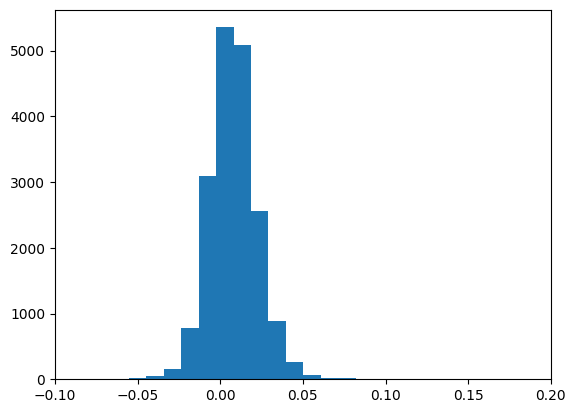

In [7]:
sttc_neo = sd.spike_time_tilings( 20 ) 
plt.hist( sttc_neo.flatten(), bins=100 )
plt.xlim(-.1,.2)


In [8]:

import numpy as np
from human_hip.spike_data import latencies, cross_sttc


def curate_latencies(sd,  latency_ms=30, sttc_cutoff = 0, latency_cutoff=1, sttc_delta=20, pval=.05, min_latencies=25 ):

    # Get all latencies whose STTC is above some minimum STTC cuttoff
    print(sd.N**2 , "Starting Pairs")
    sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix   
    pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
    for i in range(sd.N):
        for j in range(i+1,sd.N):
            if sttc_neo[i,j] > sttc_cutoff:
                pairs.append([i,j])
    print( len(pairs), "pairs above sttc cutoff")

    # Get all latencies whose median latency is above some minimum Latency Cuttoff
    pairs_late = [] #lags_late = []
    for pair in pairs:
        pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  #latency= np.median(pair_latencies)
        if len(pair_latencies)>=min_latencies and abs(np.mean(pair_latencies))> latency_cutoff :
            if np.mean(pair_latencies) < 0:
                pair_latencies = latencies( pair[1], pair[0], sd, ms_cutoff_high=latency_ms) 
                if np.mean(pair_latencies)> latency_cutoff and len(pair_latencies)>=min_latencies:
                    t_stat, p_value = stats.ttest_1samp( pair_latencies, 0)
                    if p_value < pval:
                        pairs_late.append( [ pair[1], pair[0] ] )
            else:
                t_stat, p_value = stats.ttest_1samp( pair_latencies, 0)
                if p_value < pval:
                    pairs_late.append( pair )
    print( len(pairs_late), "pairs above latencency cutoff")

    mean_latencies = []
    for pair in pairs_late:
        mean_latency = np.mean( latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  )
        mean_latencies.append(mean_latency)
    print("all final pairs positive?:", np.all( np.array(mean_latencies)>0 ))
    #good_pairs =   np.array(pairs_final)

    return  pairs_late

In [9]:
latency_ms = 30
good_pairs = curate_latencies(sd, latency_ms=30, sttc_cutoff = 0.01, latency_cutoff=1, sttc_delta=20, pval=.05, min_latencies=25 ) 

# latency_ms = 15
# good_pairs = curate_latencies(sd,  latency_ms=latency_ms, sttc_cutoff = 0.02, latency_cutoff=1, sttc_delta=20, pval=.05 ) 

good_pairs2 = np.array(good_pairs)


# with open( 'hc328_good_pairs.pkl' , 'wb') as my_file:
#    pickle.dump(good_pairs, my_file)
# load pickled data
# with open( 'hc328_good_pairs.pkl' , 'rb') as my_file:
#     good_pairs = pickle.load(my_file)

18496 Starting Pairs
3935 pairs above sttc cutoff
126 pairs above latencency cutoff
all final pairs positive?: True


In [9]:
# with open( 'hc328_good_pairs.pkl' , 'wb') as my_file:
#    pickle.dump(good_pairs, my_file)

In [10]:
#good_pairs
print( len(good_pairs), "good pairs" )

mean_latencies = []
for pair in good_pairs:
    mean_latency = np.mean( latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  )
    mean_latencies.append(mean_latency)
print("all final pairs positive?:", np.all( np.array(mean_latencies)>0 ))

126 good pairs
all final pairs positive?: True


# make plots

all final pairs positive?: True


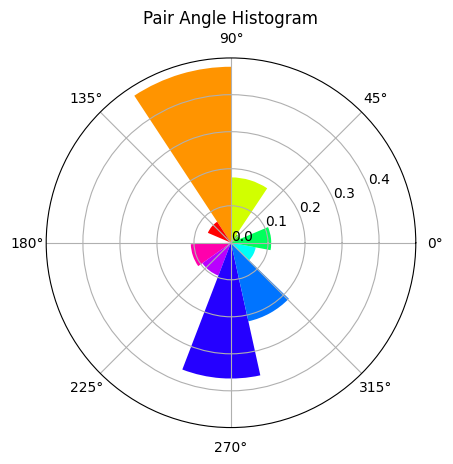

In [11]:
plot_latency_angle_hist(sd, good_pairs, late_cutoff_high=latency_ms)

all final pairs positive?: True


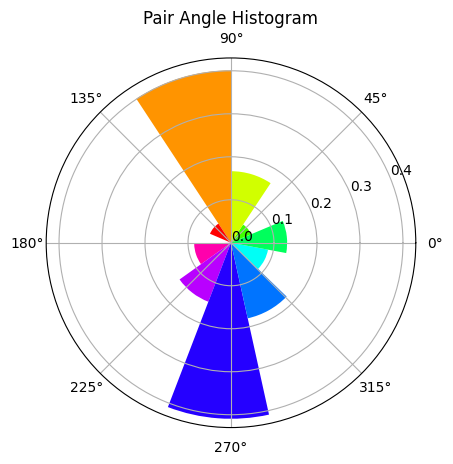

In [12]:
plot_latency_angle_hist(sd, good_pairs, by_firing_rate=True, late_cutoff_low=0, late_cutoff_high=latency_ms)

# Make Plots

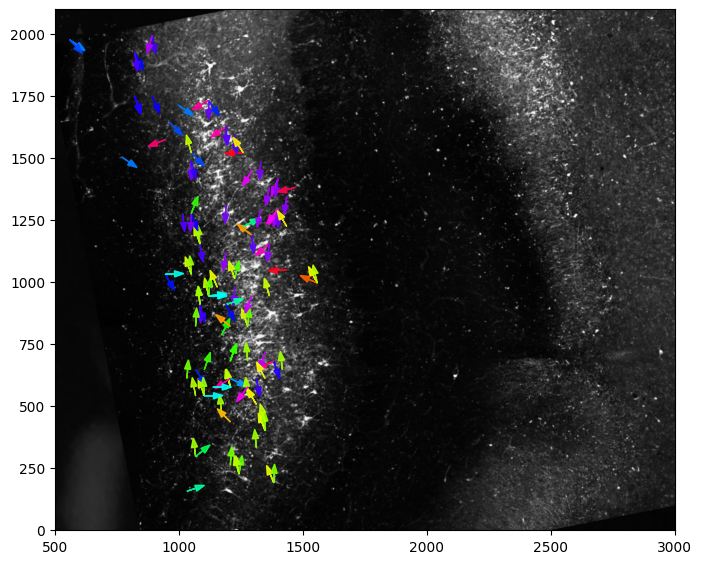

In [13]:
plot_vector_layout1( sd, good_pairs, image_path="/workspaces/human_hippocampus/data/histology/hc328_bw.jpeg", xlim=(500,3000) )

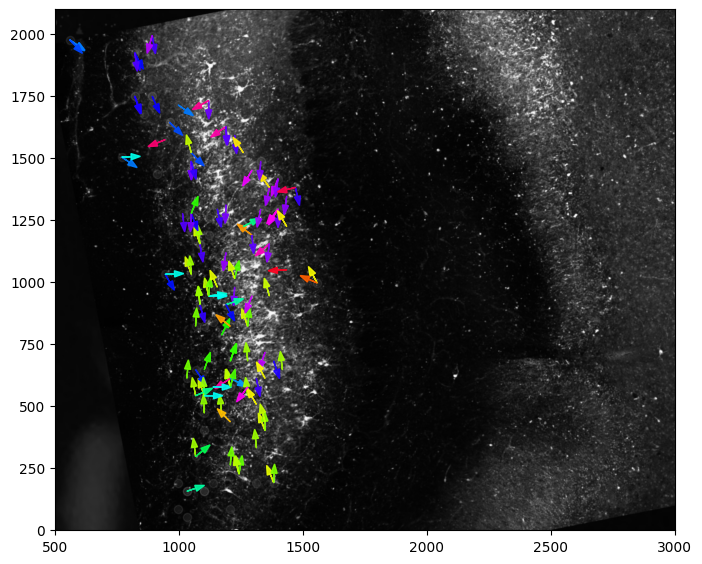

In [14]:
plot_vector_layout( sd, good_pairs2, image_path="/workspaces/human_hippocampus/data/histology/hc328_bw.jpeg", xlim=(500,3000) )

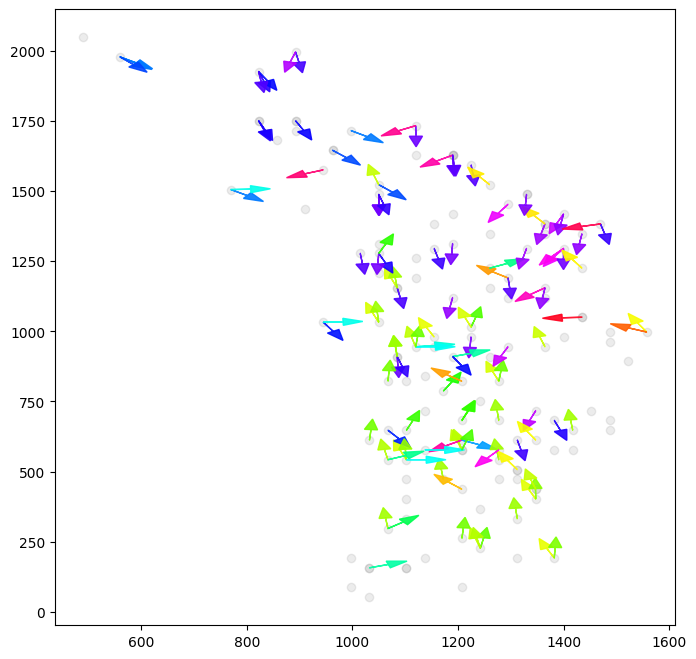

In [15]:
plot_vector_layout( sd, good_pairs2)

# <font color="brown"> Figure out Randomizations

In [27]:
with open("/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl", "rb") as filename:
    sd = pickle.load(filename)

In [77]:
import numpy as np
import random as rand
from braingeneers.analysis.analysis import SpikeData, randomize_raster

In [29]:
sd.train[0].shape

(978,)

In [35]:
len(sd.train)

136

## rotation code

In [16]:
seedIn=1
RotatedTrain = []
TrainDat = sd.train

np.random.seed(seedIn) # set random seed to seedIn
seeds = [np.random.randint(0, 1000000000) for _ in range(len(TrainDat))] # creat array of randomized seeds from seedIn
i = 0

for neuron in TrainDat: # Loop through indiv neurons in train
    neuronTrain = []
    rand.seed(seeds[i]) # set random seed to one of seedIn's generated vals
    i += 1
    alpha = rand.randrange(1, len(neuron)) # Select random index
    
    index = alpha
    prevtime = 0 # global time
    while index < len(neuron): # Loop through neurons after alpha
        firingInst = neuron[index] - neuron[index - 1] # calculate firing time difference
        firingInst += prevtime # add difference to global time
        neuronTrain.append(firingInst)
        prevtime = firingInst # update global time
        index += 1
    index = 0
    splitEndVal = neuronTrain[-1] # get last time value of the split
    while index < alpha: # Loop through before alpha
        neuronTrain.append(neuron[index] + splitEndVal) # add times of pre-alpha neurons to the last time value and append 
        index += 1
    
    RotatedTrain.append(np.array(neuronTrain))

In [19]:
RotatedTrain[0].shape

(978,)

## Random Shuffle

In [76]:
def random_shuffle(sd, seedIn=1): #seed=np.random.randint(0, 10000)
    # Randomizes a dataset while perseving an underlying structure by swaping firing times between neurons
    Rastered = sd.raster(bin_size=1) # get spikedata's raster
    RasterT = np.transpose(Rastered) # transpose raster to look at individual time slices
    shuffleT = []
    dt=1.0

    np.random.seed(seedIn) # set random seed to seedIn
    seeds = [np.random.randint(0, 1000000000) for _ in range(len(RasterT))] # creat array of randomized seeds from seedIn
    i = 0

    for timeslice in RasterT:
        randslice = np.copy(timeslice) 
        np.random.seed(seeds[i]) # set local seed to a seedIn generated value for randomized shuffle
        i += 1
        np.random.shuffle(randslice) # shuffle timeslice
        shuffleT.append(randslice) 
        
    ShuffleRaster = np.transpose(shuffleT) # re-transpose raster to get origional orientation 
    ShuffleTrain = []
    for row in ShuffleRaster:
        ShuffleTrain.append( np.nonzero(row)[0] )

    return SpikeData( ShuffleTrain, length=sd.length, N=sd.N, 
                            metadata=sd.metadata, neuron_data=sd.neuron_data,
                            neuron_attributes=sd.neuron_attributes)

## Harris Shuffle

In [90]:
def random_harris(sd, seed=1): #seed=None
    '''
    Kenneth Harris Method, Create a new SpikeData object which preserves the population
    rate and mean firing rate of each neuron in an existing
    SpikeData by randomly reallocating all spike times to different
    neurons at a resolution given by dt.
    '''
    # Collect the spikes of the original Spikedata and define a new
    # "randomized spike matrix" to store them in.
    sm = sd.sparse_raster(1.0)     # spike raster with 1ms bins 
    dt=1.0

    ShuffleRaster = randomize_raster(sm, seed)
    ShuffleTrain = []
    for row in ShuffleRaster:
        ShuffleTrain.append( np.nonzero(row)[0] )

    return SpikeData( ShuffleTrain, length=sd.length, N=sd.N, 
                            metadata=sd.metadata, neuron_data=sd.neuron_data,
                            neuron_attributes=sd.neuron_attributes )

